# iMobile Images

In [68]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [69]:
def img_to_text(img):
    neft_string = pytesseract.image_to_string(img)
    return neft_string

In [70]:
def img_read(img_path,img):
    img1= cv2.imread(img_path+img)
    img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img1 = cv2.threshold(img1,0,255,cv2.THRESH_OTSU)[1]
    return img1

In [71]:
img_path = 'Images/iMobile/'
img_list = os.listdir(img_path)

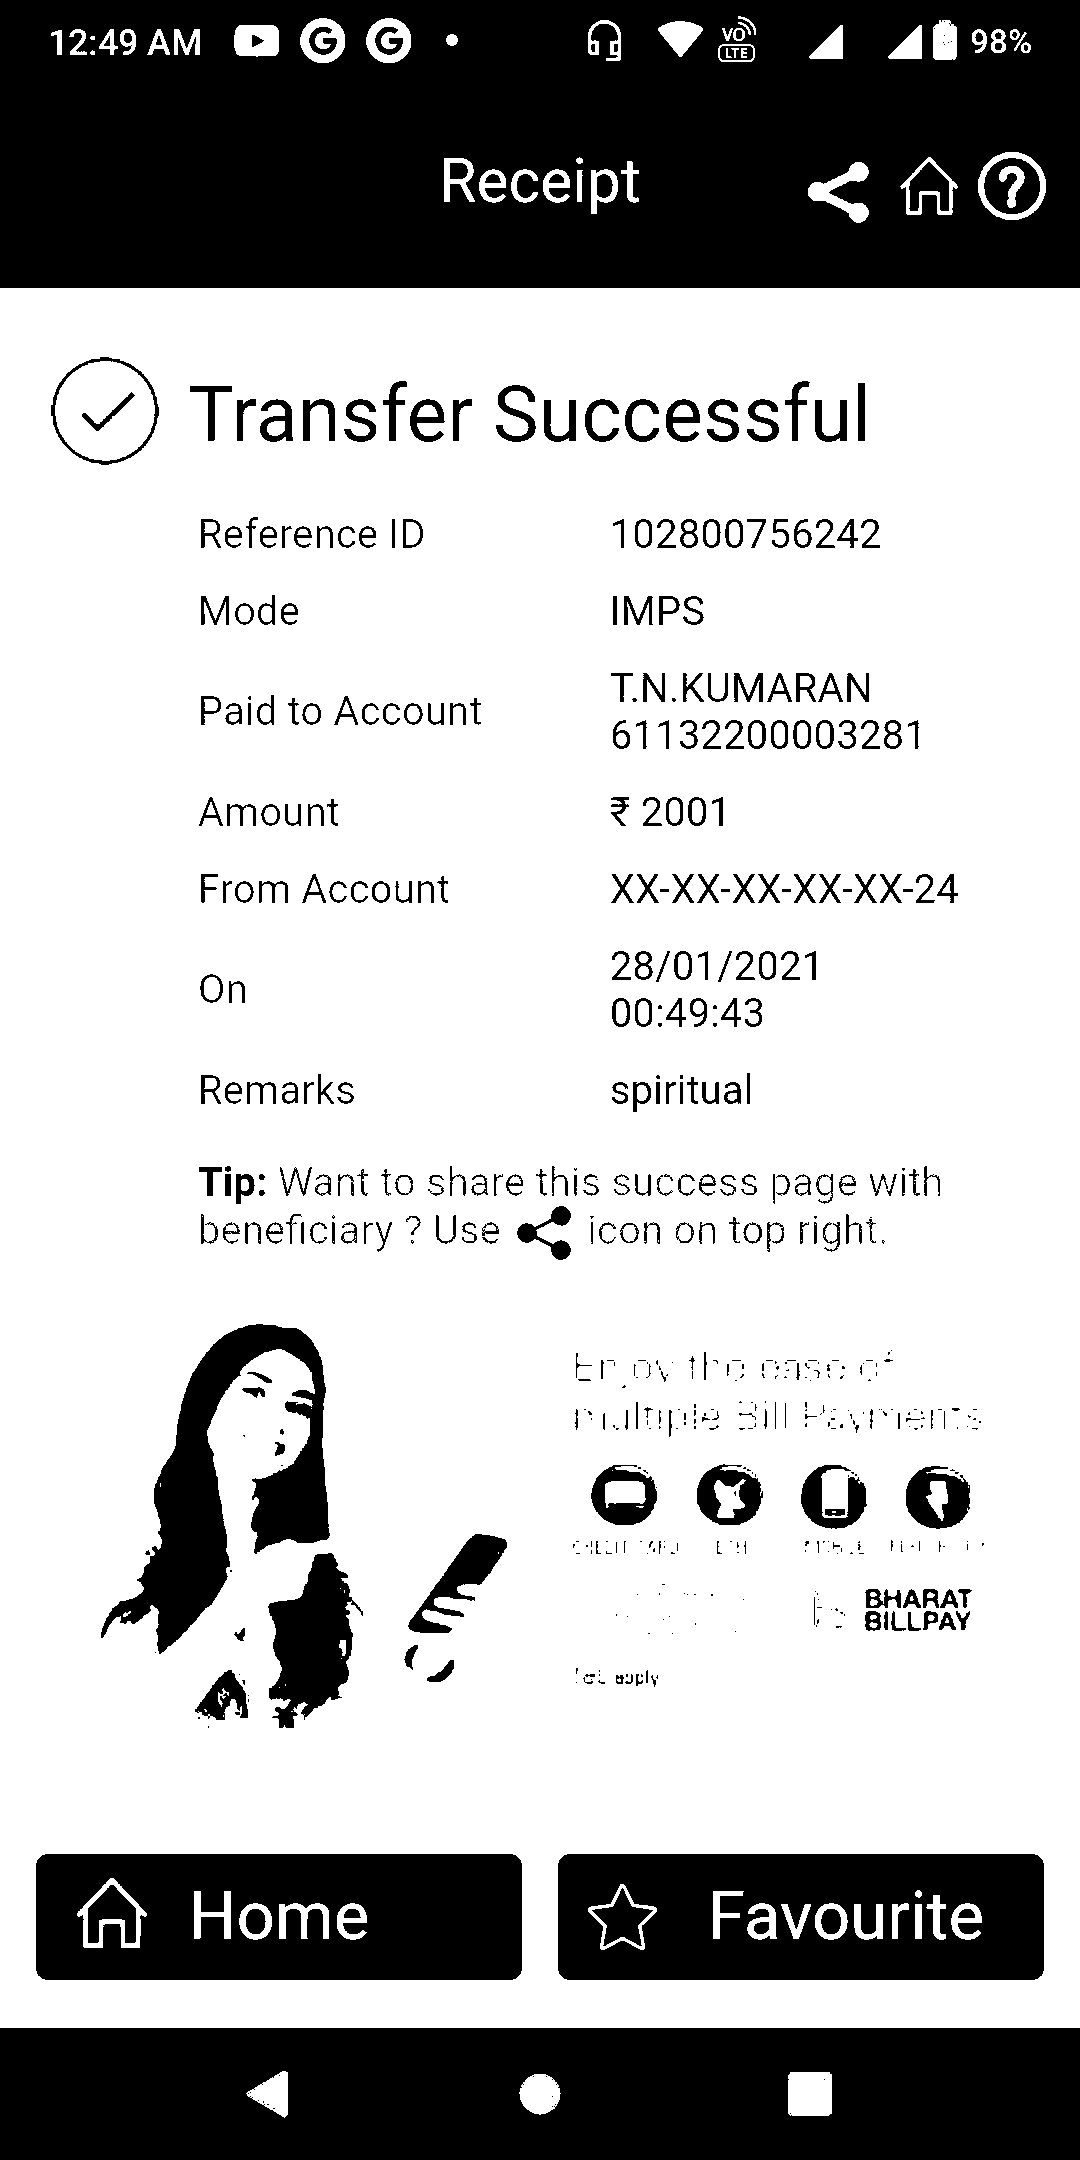

In [72]:
img = img_read(img_path,img_list[0])
Image.fromarray(img)

In [73]:
import pytesseract
import re

In [74]:
imobile_string = img_to_text(img)
imobile_string

'12:49AM @BO@- er 2 Ge | ee\n\nTeton << A®\n\n \n\nVv) Transfer Successful\n\nReference ID 102800756242\nMode IMPS\n\n. T.N.KUMARAN\nPaid to Account 61132200003281\nAmount = 2001\nFrom Account XX-XX-XX-XX-XX-24\n\n28/01/2021\n\nOn 00:49:43\nRemarks spiritual\n\nTip: Want to share this success page with\nbeneficiary ? Use < icon on top right.\n\nEr oy tho oase a\nrialtypie Sal Peeyerents\n2 ooo\nTROL ABA L Koi biel koi\nb> BittBay\nCy "eh aaply\n\n \n\x0c'

In [75]:
imob_split = imobile_string.split('\n')

In [80]:
def extract_imobile_text(imobile_string,imob_split):
    vals = []
    vals.append(re.findall('Reference ID \d{0,5000}',imobile_string)[0])
    vals.append(re.findall('XX-XX-XX-XX-XX-\d{0,2}',imobile_string)[0])
    vals.append(re.findall('Paid to Account \d{0,5000}',imobile_string)[0])
    vals.append(re.findall('Amount = \d{0,5000}',imobile_string)[0])
    vals.append(re.findall('\d{0,2}/\d{0,2}/\d{0,2}',imobile_string)[0])

    Beneficiary_Name = [imob_split[i-1] for i in range(len(imob_split)) if len(re.findall('Paid to Account',imob_split[i]))==1][0]
    vals.append(Beneficiary_Name)

    remarks = [imob_split[i]for i in range(len(imob_split)) if len(re.findall('Remarks',imob_split[i]))==1][0]
    vals.append(remarks)
    return vals

iMobile_extracted = extract_imobile_text(imobile_string,imob_split)

pd.DataFrame(iMobile_extracted).T

,0,1,2,3,4,5,6
0,Reference ID 102800756242,XX-XX-XX-XX-XX-24,Paid to Account 61132200003281,Amount = 2001,28/01/20,. T.N.KUMARAN,Remarks spiritual


In [83]:
#Creating a for loop  for all images

In [107]:
img_path = 'Images/iMobile/'
img_list = os.listdir(img_path)

In [117]:
iMobile_df = pd.DataFrame()
for i in range(len(img_list)):
    img = img_read(img_path,img_list[i])
    imobile_string = img_to_text(img)
    imob_split = imobile_string.split('\n')
    iMobile_extracted = pd.DataFrame(extract_imobile_text(imobile_string,imob_split)).T
    iMobile_df = pd.concat([iMobile_df,iMobile_extracted],axis = 0)

In [198]:
mapper = dict(zip(list(range(7)),['id','Payee AC No.','Sent to Ac no.','Amount_Sent','Date','Name_Receiver','Remarks']))
iMobile_df = iMobile_df.rename(columns = mapper)
iMobile_df.to_excel('Docs/iMobile_mobile_tx.xlsx',index = False)
iMobile_df

,id,Payee AC No.,Sent to Ac no.,Amount_Sent,Date,Name_Receiver,Remarks
0,Reference ID 102800756242,XX-XX-XX-XX-XX-24,Paid to Account 61132200003281,Amount = 2001,28/01/20,. T.N.KUMARAN,Remarks spiritual
0,Reference ID 102800756242,XX-XX-XX-XX-XX-24,Paid to Account 61132200003281,Amount = 2001,28/01/20,. T.N.KUMARAN,Remarks spiritual
0,Reference ID 102800756242,XX-XX-XX-XX-XX-24,Paid to Account 61132200003281,Amount = 2001,28/01/20,. T.N.KUMARAN,Remarks spiritual
0,Reference ID 102800756242,XX-XX-XX-XX-XX-24,Paid to Account 61132200003281,Amount = 2001,28/01/20,. T.N.KUMARAN,Remarks spiritual
0,Reference ID 102800756242,XX-XX-XX-XX-XX-24,Paid to Account 61132200003281,Amount = 2001,28/01/20,. T.N.KUMARAN,Remarks spiritual
0,Reference ID 102800756242,XX-XX-XX-XX-XX-24,Paid to Account 61132200003281,Amount = 2001,28/01/20,. T.N.KUMARAN,Remarks spiritual
0,Reference ID 102800756242,XX-XX-XX-XX-XX-24,Paid to Account 61132200003281,Amount = 2001,28/01/20,. T.N.KUMARAN,Remarks spiritual


# Mobile Transfer

In [199]:
img_path1 = 'Images/Mobile_NEFT/'
img_list1 = os.listdir(img_path1)

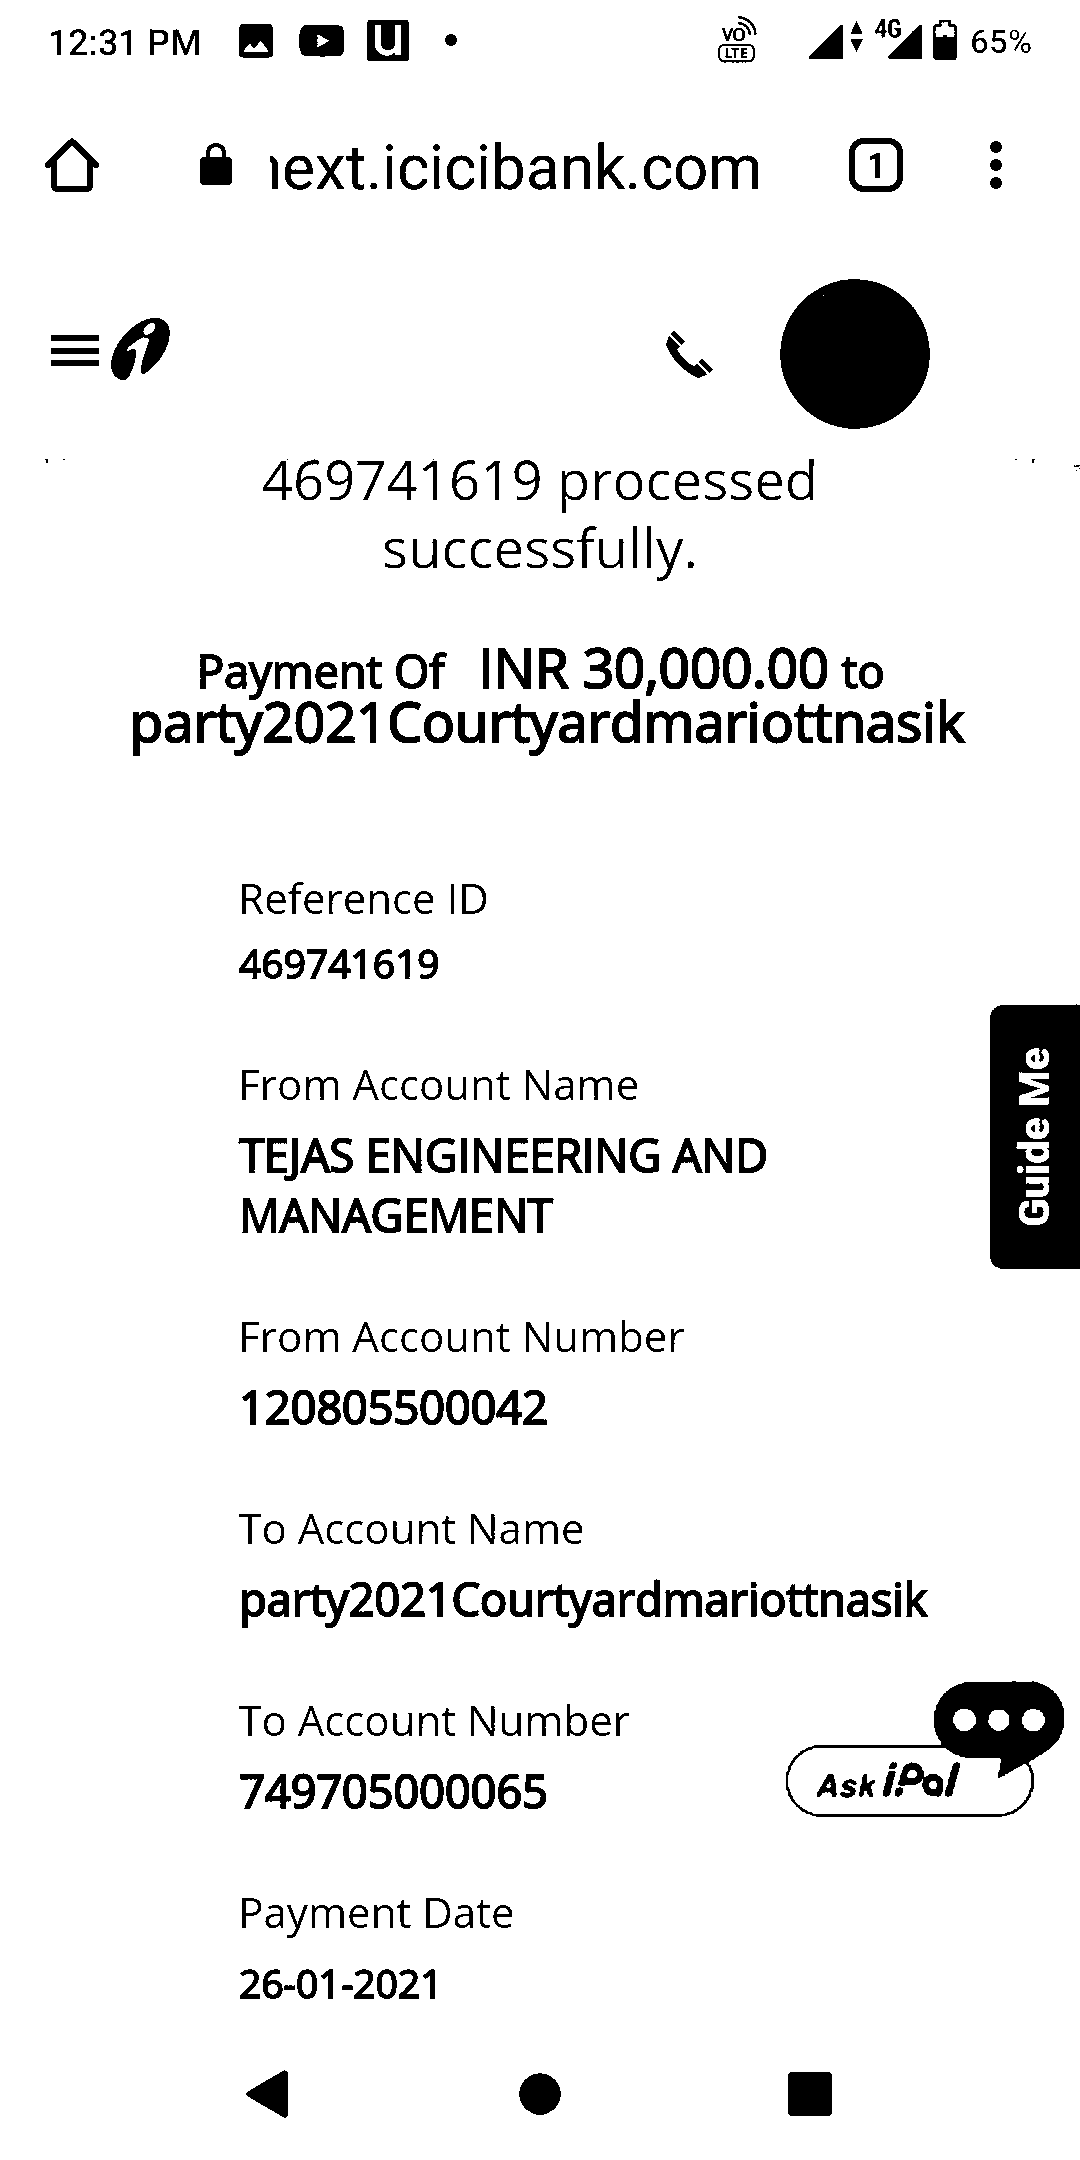

In [200]:
img1 = img_read(img_path1,img_list1[0])
Image.fromarray(img1)

In [201]:
neft_string = img_to_text(img1)
neft_string_split = neft_string.split('\n')

In [202]:
neft_string

'12:31PM Re - A “hi 65%\nQf exticicibank.ccom @ :\n\nq a\n\n469741619 processed\nsuccessfully.\n\nPayment Of INR 30,000.00 to\nparty2021 Courtyardmariottnasik\n\nReference ID\n469741619\n\nFrom Account Name\n\nTEJAS ENGINEERING AND\nMANAGEMENT\n\nFrom Account Number\n120805500042\n\nTo Account Name\nparty2021 Courtyardmariottnasik\n\nTo Account Number rx\n\n749705000065\n\nPayment Date\n26-01-2021\n\n< @ a\n\x0c'

In [203]:
#Amt Transfered
def extract_neft_text(neft_string_split,neft_string):
    vals = []
    ref_id = re.findall('Reference ID\n\d{0,20}',neft_string)[0]
    vals.append(ref_id)
    date = re.findall('Date\n\d{0,2}-\d{0,2}-\d{0,4}',neft_string)[0]
    vals.append(date)
    amt_trans = [neft_string_split[i] for i in range(len(neft_string_split)) if len(re.findall('INR',neft_string_split[i]))>0]
    vals.append(amt_trans[0])
    payment_to = [neft_string_split[i+1] for i in range(len(neft_string_split)) if len(re.findall('INR',neft_string_split[i]))>0]
    vals.append(payment_to[0])
    payment_from = [neft_string_split[i+2:i+5] for i in range(len(neft_string_split)) if len(re.findall('From Account Name',neft_string_split[i]))>0][0]
    vals.append(payment_from)
    from_ac_no = re.findall('From Account Number\n\d{0,5000}',neft_string)[0].split('\n')[1]
    vals.append(from_ac_no)
    to_ac_name = [neft_string_split[i+1:i+3] for i in range(len(neft_string_split)) if len(re.findall('To Account Name',neft_string_split[i]))>0][0]
    vals.append(to_ac_name)
    to_ac_no = [neft_string_split[i-3:i] for i in range(len(neft_string_split)) if len(re.findall('Payment Date',neft_string_split[i]))>0][0]
    vals.append(to_ac_no)
    
    return vals


In [204]:
neft_extracted = extract_neft_text(neft_string_split,neft_string)
pd.DataFrame(neft_extracted).T

,0,1,2,3,4,5,6,7
0,Reference ID\n469741619,Date\n26-01-2021,"Payment Of INR 30,000.00 to",party2021 Courtyardmariottnasik,"[TEJAS ENGINEERING AND, MANAGEMENT, ]",120805500042,"[party2021 Courtyardmariottnasik, ]","[, 749705000065, ]"


In [205]:
img_path1 = 'Images/Mobile_NEFT/'
img_list1 = os.listdir(img_path1)

neft_df = pd.DataFrame()
for i in range(len(img_list1)):
    img1 = img_read(img_path1,img_list1[i])
    neft_extracted = pd.DataFrame(extract_neft_text(neft_string_split,neft_string)).T
    neft_df = pd.concat([neft_df,neft_extracted],axis = 0)

In [207]:
mapper = dict(zip(list(range(8)),['id','date','payment','receiver name.','Sender Name.','Sender AC No.','Name_Receiver','Receiver_AC_No']))
neft_df = neft_df.rename(columns = mapper)
neft_df.to_excel('Docs/neft_mobile_tx.xlsx',index = False)

PermissionError: [Errno 13] Permission denied: 'Docs/neft_mobile_tx.xlsx'